In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(60, 1226):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [14]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 6s 42ms/step - loss: 0.0292
Epoch 2/100
37/37 [==============================] - 2s 43ms/step - loss: 0.0063
Epoch 3/100
37/37 [==============================] - 2s 61ms/step - loss: 0.0061
Epoch 4/100
37/37 [==============================] - 3s 78ms/step - loss: 0.0053
Epoch 5/100
37/37 [==============================] - 3s 74ms/step - loss: 0.0049
Epoch 6/100
37/37 [==============================] - 3s 74ms/step - loss: 0.0044
Epoch 7/100
37/37 [==============================] - 3s 70ms/step - loss: 0.0054
Epoch 8/100
37/37 [==============================] - 3s 70ms/step - loss: 0.0044
Epoch 9/100
37/37 [==============================] - 3s 75ms/step - loss: 0.0049
Epoch 10/100
37/37 [==============================] - 3s 71ms/step - loss: 0.0043
Epoch 11/100
37/37 [==============================] - 3s 70ms/step - loss: 0.0043
Epoch 12/100
37/37 [==============================] - 3s 70ms/step - loss: 0.0043
Epoch 13/100
37/37 [=====

In [20]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


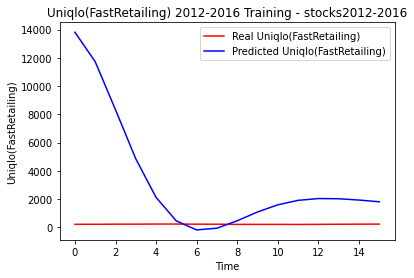

In [22]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Uniqlo(FastRetailing)')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Uniqlo(FastRetailing)')
plt.title('Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016')
plt.xlabel('Time')
plt.ylabel('Uniqlo(FastRetailing)')
plt.legend()
plt.show()